# 의약품처방정보
* https://www.data.go.kr/dataset/15007117/fileData.do
* 의약품처방정보는 2002년부터 2013년까지의 국민건강보험 가입자 중 의약품처방이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 의약품처방전별 개별 의약품에 대한 처방내역(요양개시일자, 1회투약량, 1일투약량, 총투여일수 등)으로 구성된 개방데이터이다.

In [1]:
%ls data/NHIS_OPEN_T60_2016

NHIS_OPEN_T60_2016_PART1.csv* NHIS_OPEN_T60_2016_PART2.csv*


In [29]:
import matplotlib.pyplot as plt

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
nhis = pd.read_csv('data/NHIS_OPEN_T60_2016/NHIS_OPEN_T60_2016_PART1.csv', encoding='euc-kr')
nhis.shape

(20000000, 15)

In [4]:
nhis.columns

Index(['기준년도', '가입자일련번호', '처방내역일련번호', '일련번호', '성별코드', '연령대코드(5세단위)', '시도코드',
       '요양개시일자', '약품일반성분명코드', '1회 투약량', '1일 투약량', '총투여일수', '단가', '금액',
       '데이터공개일자'],
      dtype='object')

In [5]:
nhis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000000 entries, 0 to 19999999
Data columns (total 15 columns):
기준년도           int64
가입자일련번호        int64
처방내역일련번호       int64
일련번호           int64
성별코드           int64
연령대코드(5세단위)    int64
시도코드           int64
요양개시일자         int64
약품일반성분명코드      object
1회 투약량         float64
1일 투약량         int64
총투여일수          int64
단가             float64
금액             int64
데이터공개일자        int64
dtypes: float64(2), int64(12), object(1)
memory usage: 2.2+ GB


In [6]:
nhis['기준년도'] = nhis['기준년도'].astype(str)
nhis['성별코드'] = nhis['성별코드'].astype(str)
nhis['시도코드'] = nhis['시도코드'].astype(str)
nhis['요양개시일자'] = nhis['요양개시일자'].astype(str)
nhis['데이터공개일자'] = nhis['데이터공개일자'].astype(str)

In [7]:
nhis.isnull().sum()

기준년도              0
가입자일련번호           0
처방내역일련번호          0
일련번호              0
성별코드              0
연령대코드(5세단위)       0
시도코드              0
요양개시일자            0
약품일반성분명코드      1661
1회 투약량            0
1일 투약량            0
총투여일수             0
단가                0
금액                0
데이터공개일자           0
dtype: int64

In [8]:
pd.options.display.float_format = '{:,.0f}'.format
nhis.describe()

,가입자일련번호,처방내역일련번호,일련번호,1회 투약량,1일 투약량,총투여일수,단가,금액
count,"20,000,000","20,000,000","20,000,000","20,000,000","20,000,000","20,000,000","20,000,000","20,000,000"
mean,"251,892","31,346,455",3,2,2,11,397,"5,651"
std,"145,518","18,109,616",2,8,1,19,"2,228","83,428"
min,1,19,1,0,0,0,0,0
25%,"125,750","15,655,799",2,1,2,3,53,564
50%,"252,444","31,319,294",3,1,3,3,116,"1,266"
75%,"377,747","47,046,749",4,1,3,7,261,"3,654"
max,"503,691","62,705,118",56,"20,120",80,840,"357,142","270,000,000"


In [9]:
nhis.head()

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일 투약량,총투여일수,단가,금액,데이터공개일자
0,2016,1,258969,1,2,11,28,20160219,100901ATB,1,2,3,188,1128,20171218
1,2016,1,258969,2,2,11,28,20160219,152301ATB,1,2,3,115,690,20171218
2,2016,1,258969,3,2,11,28,20160219,222901ATB,1,2,3,63,378,20171218
3,2016,1,18744123,3,2,11,28,20161220,421001ATB,1,3,5,103,1545,20171218
4,2016,1,18744123,2,2,11,28,20161220,101804ACH,1,3,5,81,1215,20171218


In [20]:
nhis.tail()

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일 투약량,총투여일수,단가,금액,데이터공개일자
19999995,2016,503691,47807845,3,1,10,41,20160712,152501ATB,1,2,2,457,1828,20171218
19999996,2016,503691,47807845,1,1,10,41,20160712,222805ATB,1,3,2,112,672,20171218
19999997,2016,503691,493075,1,1,10,41,20161001,271800ATB,1,2,5,255,2550,20171218
19999998,2016,503691,493075,3,1,10,41,20161001,193302ATB,1,2,5,98,980,20171218
19999999,2016,503691,493075,4,1,10,41,20161001,521601ATB,1,2,5,248,2480,20171218


In [10]:
#2016년 데이터만 있다.
nhis['기준년도'].value_counts()

2016    20000000
Name: 기준년도, dtype: int64

In [11]:
total_dose_day = nhis['총투여일수'].value_counts()
print(np.max(total_dose_day))
print(np.min(total_dose_day))
print(np.mean(total_dose_day))
print(np.median(total_dose_day))

7316870
1
76045.62737642585
236.0


In [12]:
nhis['성별코드'].value_counts()

2    11266113
1     8733887
Name: 성별코드, dtype: int64

In [15]:
nhis.groupby('성별코드')["금액"].mean()

성별코드
1   6,211
2   5,217
Name: 금액, dtype: float64

In [19]:
nhis.groupby('기준년도')["금액"].mean()

기준년도
2016   5,651
Name: 금액, dtype: float64

In [23]:
nhis['연령대코드(5세단위)'] = nhis['연령대코드(5세단위)'].astype(int)

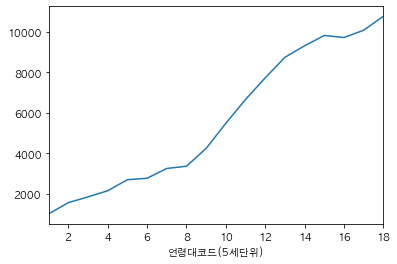

In [30]:
nhis.groupby('연령대코드(5세단위)')["금액"].mean().plot()

In [31]:
nhis["총투여일수"].describe()

count   20,000,000
mean            11
std             19
min              0
25%              3
50%              3
75%              7
max            840
Name: 총투여일수, dtype: float64

In [37]:
# 총 투여일수가 1년 이상인 데이터
nhis[nhis["총투여일수"] > 365].shape

(135, 15)

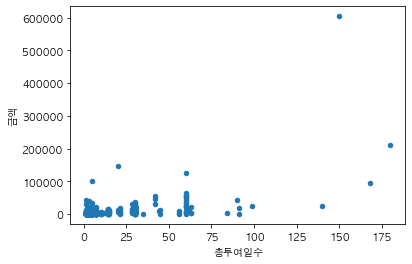

In [38]:
# 데이터양이 많아 샘플 1000개에 대해서만 시각화
nhis[["총투여일수", "금액"]].sample(1000).plot.scatter(x="총투여일수", y="금액")

In [41]:
# 총투여일수가 100일 미만이고 금액이 5만원 미만인 데이터
nhis_day_100 = nhis[(nhis["총투여일수"] < 100) & (nhis["금액"] < 50000)]
nhis_day_100.shape

(19626311, 15)

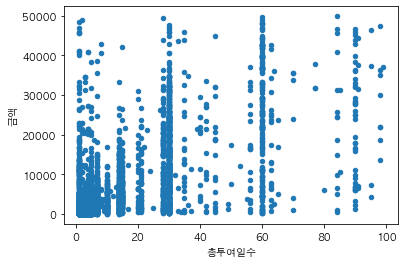

In [43]:
# 총투여일수 100일 미안의 scatterplot을 그린다. 
# 데이터가 많아 임의로 10000개를 샘플링해서 그림
nhis_day_100[["총투여일수", "금액"]].sample(10000).plot.scatter(x="총투여일수", y="금액")